# Ordinary Kriging

In [1]:
import skgstat as skg
import numpy as np
import matplotlib.pyplot as plt

openaq = np.load('/home/mgraca/Workspace/hrrr-smoke-viz/pwwb-experiments/tensorflow/data/openaq_cache/openaq_processed.npz', allow_pickle=True)
openaq_data = openaq['data']
sensor_locations = openaq['sensor_locations'].item()
print(openaq_data.shape)
print(len(sensor_locations))

(17544, 40, 40)
188


In [2]:
X, Y = zip(*[(x, y) for x, y in sensor_locations.values()])
coords = list(sensor_locations.values())
print(coords)

values = openaq_data[0, X, Y]
print(values.mean(), values.min(), values.max())

[(14, 20), (36, 38), (20, 28), (23, 12), (4, 5), (12, 4), (17, 11), (12, 8), (15, 28), (32, 32), (28, 13), (10, 33), (8, 1), (26, 18), (20, 30), (14, 8), (14, 5), (18, 12), (28, 10), (31, 9), (11, 8), (20, 9), (11, 5), (13, 4), (9, 7), (22, 11), (25, 11), (22, 11), (10, 9), (19, 10), (18, 10), (15, 11), (14, 9), (17, 12), (10, 4), (30, 10), (11, 5), (20, 8), (8, 5), (13, 5), (8, 6), (9, 5), (20, 10), (10, 6), (10, 8), (25, 10), (14, 7), (26, 10), (21, 10), (30, 10), (24, 9), (15, 6), (11, 7), (11, 4), (18, 13), (10, 5), (10, 10), (8, 6), (18, 11), (16, 8), (9, 3), (8, 13), (16, 11), (20, 6), (12, 5), (19, 10), (18, 7), (14, 6), (11, 3), (23, 11), (7, 7), (19, 7), (21, 11), (9, 10), (21, 12), (7, 5), (13, 3), (10, 6), (11, 3), (8, 5), (22, 12), (19, 10), (21, 11), (10, 8), (29, 10), (18, 5), (18, 9), (16, 11), (12, 7), (9, 3), (19, 11), (9, 6), (7, 7), (18, 11), (19, 9), (13, 3), (11, 7), (8, 7), (9, 7), (13, 8), (20, 9), (18, 8), (29, 9), (16, 11), (12, 5), (17, 10), (12, 2), (11, 6), 

{'model': 'spherical', 'estimator': 'matheron', 'dist_func': 'euclidean', 'normalized_effective_range': 734.445479931711, 'normalized_sill': 38.51175553873892, 'normalized_nugget': 1.5632576912362453e-16, 'effective_range': 22.673420327117995, 'sill': 5.699008978438703, 'nugget': 2.3133247221117067e-17, 'params': {'estimator': 'matheron', 'model': 'spherical', 'dist_func': 'euclidean', 'bin_func': 'kmeans', 'normalize': False, 'fit_method': 'trf', 'fit_sigma': None, 'use_nugget': True, 'maxlag': None, 'n_lags': 10, 'verbose': False}, 'kwargs': {}}


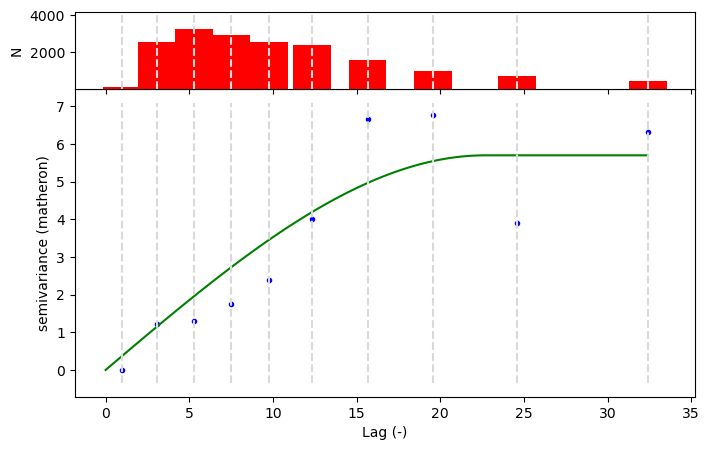

In [3]:
V = skg.Variogram(
    coordinates=coords,
    values=values,
    estimator='matheron',
    model='spherical',
    bin_func='kmeans',
    use_nugget=True,
    n_lags=10,
    normalize=False,
)
fig = V.plot(show=False)
print(V.describe())

(40, 40)


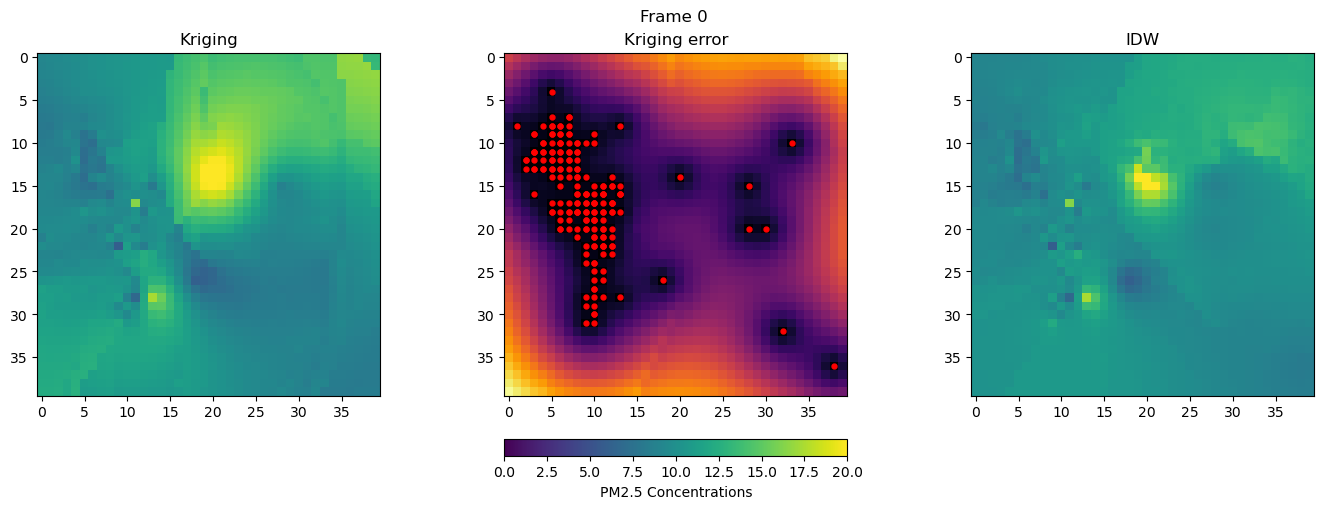

In [4]:
ok = skg.OrdinaryKriging(V, min_points=3, max_points=25, mode='exact')
xx, yy = np.mgrid[0:40, 0:40]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
print(field.shape)

fig, axes = plt.subplots(1, 3, figsize=(14, 5), constrained_layout=True)
im1 = axes[0].imshow(field, vmin=0, vmax=20)
axes[0].set_title('Kriging')

im2 = axes[1].imshow(ok.sigma.reshape(xx.shape), cmap='inferno')
axes[1].set_title('Kriging error')
axes[1].scatter(Y, X, color='red', s=12.5)

im3 = axes[2].imshow(openaq_data[0], vmin=0, vmax=20)
axes[2].set_title('IDW')
fig.colorbar(im1, ax=axes, orientation='horizontal', pad=0.05, fraction=0.05, shrink=0.7, label=f'PM2.5 Concentrations')
plt.suptitle('Frame 0')

plt.show()

{'model': 'spherical', 'estimator': 'matheron', 'dist_func': 'euclidean', 'normalized_effective_range': 1049.2646613930788, 'normalized_sill': 214.7244395657801, 'normalized_nugget': 20.415702724025326, 'effective_range': 32.39235498374699, 'sill': 11.97778565410268, 'nugget': 1.1388312932647946, 'params': {'estimator': 'matheron', 'model': 'spherical', 'dist_func': 'euclidean', 'bin_func': 'kmeans', 'normalize': False, 'fit_method': 'trf', 'fit_sigma': None, 'use_nugget': True, 'maxlag': None, 'n_lags': 10, 'verbose': False}, 'kwargs': {}}
(40, 40)


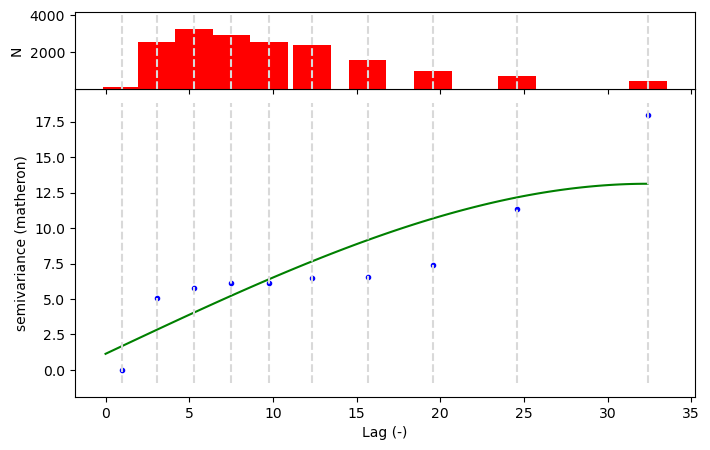

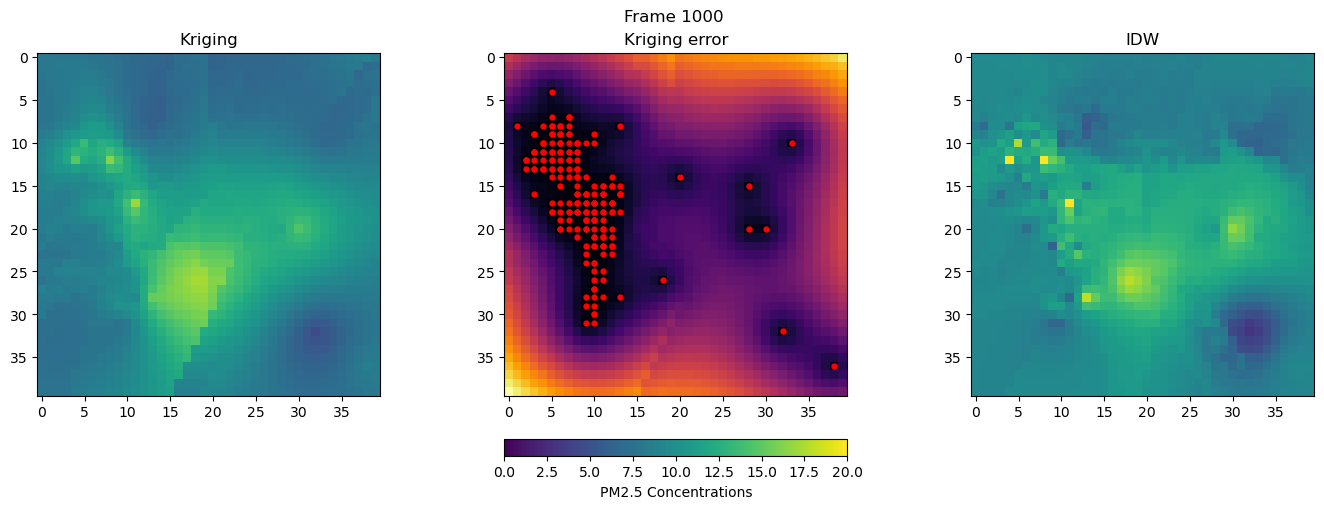

In [5]:
idx = 1000
values = openaq_data[idx, X, Y]
V = skg.Variogram(
    coordinates=coords,
    values=values,
    estimator='matheron',
    model='spherical',
    bin_func='kmeans',
    use_nugget=True,
    n_lags=10,
    normalize=False,
)
fig = V.plot(show=False)
print(V.describe())

ok = skg.OrdinaryKriging(V, min_points=3, max_points=25, mode='exact')
xx, yy = np.mgrid[0:40, 0:40]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
print(field.shape)

fig, axes = plt.subplots(1, 3, figsize=(14, 5), constrained_layout=True)
im1 = axes[0].imshow(field, vmin=0, vmax=20)
axes[0].set_title('Kriging')

im2 = axes[1].imshow(ok.sigma.reshape(xx.shape), cmap='inferno')
axes[1].set_title('Kriging error')
axes[1].scatter(Y, X, color='red', s=12.5)

im3 = axes[2].imshow(openaq_data[idx], vmin=0, vmax=20)
axes[2].set_title('IDW')
fig.colorbar(im1, ax=axes, orientation='horizontal', pad=0.05, fraction=0.05, shrink=0.7, label=f'PM2.5 Concentrations')
plt.suptitle(f'Frame {idx}')

plt.show()

{'model': 'spherical', 'estimator': 'matheron', 'dist_func': 'euclidean', 'normalized_effective_range': 1049.2646613930788, 'normalized_sill': 272.26769670881595, 'normalized_nugget': 9.309491471598251e-14, 'effective_range': 32.39235498374699, 'sill': 10.305253958081705, 'nugget': 3.5236157280170414e-15, 'params': {'estimator': 'matheron', 'model': 'spherical', 'dist_func': 'euclidean', 'bin_func': 'kmeans', 'normalize': False, 'fit_method': 'trf', 'fit_sigma': None, 'use_nugget': True, 'maxlag': None, 'n_lags': 10, 'verbose': False}, 'kwargs': {}}
(40, 40)


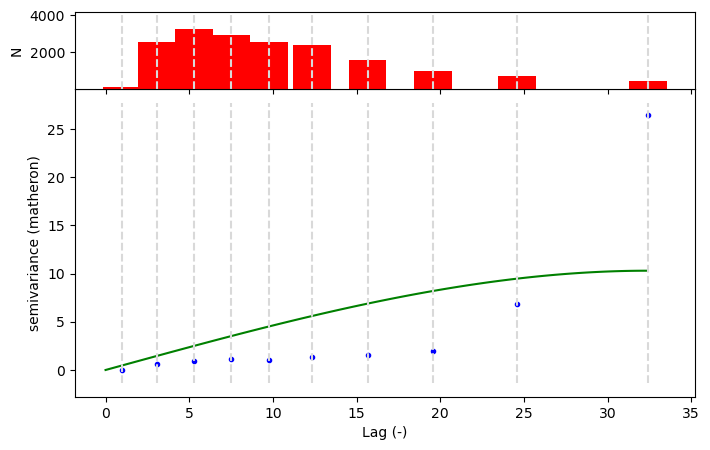

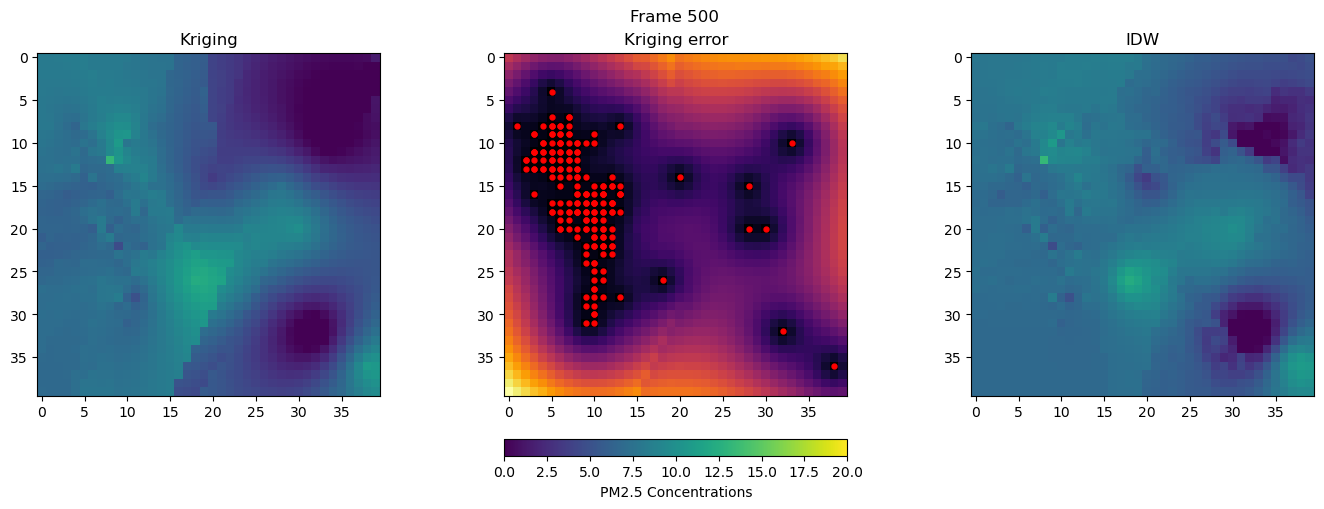

In [6]:
idx = 500
values = openaq_data[idx, X, Y]
V = skg.Variogram(
    coordinates=coords,
    values=values,
    estimator='matheron',
    model='spherical',
    bin_func='kmeans',
    use_nugget=True,
    n_lags=10,
    normalize=False,
)
fig = V.plot(show=False)
print(V.describe())

ok = skg.OrdinaryKriging(V, min_points=3, max_points=25, mode='exact')
xx, yy = np.mgrid[0:40, 0:40]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
print(field.shape)

fig, axes = plt.subplots(1, 3, figsize=(14, 5), constrained_layout=True)
im1 = axes[0].imshow(field, vmin=0, vmax=20)
axes[0].set_title('Kriging')

im2 = axes[1].imshow(ok.sigma.reshape(xx.shape), cmap='inferno')
axes[1].set_title('Kriging error')
axes[1].scatter(Y, X, color='red', s=12.5)

im3 = axes[2].imshow(openaq_data[idx], vmin=0, vmax=20)
axes[2].set_title('IDW')
fig.colorbar(im1, ax=axes, orientation='horizontal', pad=0.05, fraction=0.05, shrink=0.7, label=f'PM2.5 Concentrations')
plt.suptitle(f'Frame {idx}')

plt.show()

# Residual Kriging

{'model': 'spherical', 'estimator': 'matheron', 'dist_func': 'euclidean', 'normalized_effective_range': 1049.2646613930788, 'normalized_sill': 1522.6044784159408, 'normalized_nugget': 3.065154602299958e-12, 'effective_range': 32.39235498374699, 'sill': 32.94613757658379, 'nugget': 6.632385931633033e-14, 'params': {'estimator': 'matheron', 'model': 'spherical', 'dist_func': 'euclidean', 'bin_func': 'kmeans', 'normalize': False, 'fit_method': 'trf', 'fit_sigma': None, 'use_nugget': True, 'maxlag': None, 'n_lags': 10, 'verbose': False}, 'kwargs': {}}
(40, 40)


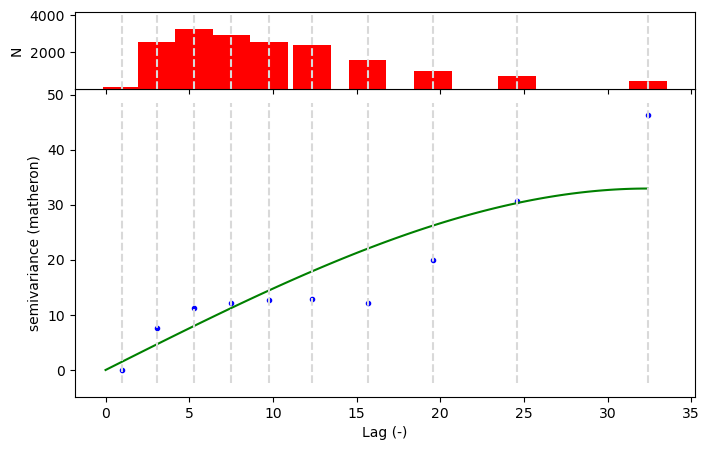

In [7]:
idx = 6871
values = openaq_data[idx, X, Y]
V = skg.Variogram(
    coordinates=coords,
    values=values,
    estimator='matheron',
    model='spherical',
    bin_func='kmeans',
    use_nugget=True,
    n_lags=10,
    normalize=False,
)
fig = V.plot(show=False)
print(V.describe())

ok = skg.OrdinaryKriging(V, min_points=3, max_points=25, mode='exact')
xx, yy = np.mgrid[0:40, 0:40]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
print(field.shape)

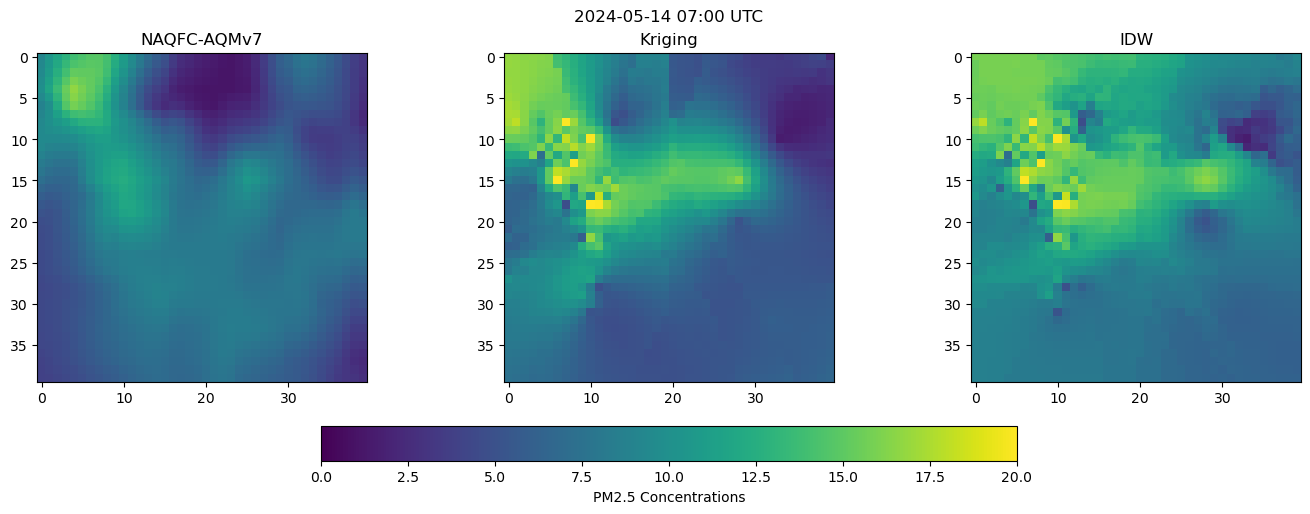

In [8]:
naqfc = np.load('data/naqfc_aqm_20240514T07.npy')
kriged = field
idwed = openaq_data[idx]

plot_params = {
    'vmin' : 0,
    'vmax' : 20
}
fig, axes = plt.subplots(1, 3, figsize=(14, 5), constrained_layout=True)
im0 = axes[0].imshow(naqfc, **plot_params)
axes[0].set_title('NAQFC-AQMv7')
im1 = axes[1].imshow(kriged, **plot_params)
axes[1].set_title('Kriging')
im2 = axes[2].imshow(idwed, **plot_params)
axes[2].set_title('IDW')

fig.colorbar(im1, ax=axes, orientation='horizontal', shrink=0.5, label=f'PM2.5 Concentrations')

plt.suptitle('2024-05-14 07:00 UTC')
plt.show()

In [9]:
# calculate residuals, then krige the residuals
residuals = idwed[X, Y] - naqfc[X, Y]
residuals

array([ 9.01853658,  3.33400211, -2.1107482 ,  2.66787739,  0.03025188,
       -1.14962273,  6.6567524 ,  0.15437679,  7.78847752, -1.25637283,
       -2.7097229 , -2.05109787,  8.06910229, -0.49964771, -0.14594322,
        5.11327705,  6.52510223,  6.10762691,  0.47567715,  0.81875223,
        6.7831274 ,  2.09002666,  3.84440231,  1.00357693,  2.969627  ,
        4.53866831,  2.09645195,  4.53866831,  3.54190273,  4.45419413,
        8.69910297,  1.26200237,  4.44885197,  1.42112637,  3.31845169,
        0.9475025 ,  3.84440231,  1.51452732,  2.51797676,  2.8371767 ,
        3.49657784,  3.99357681,  3.85522728,  2.34036868,  4.93462696,
        2.36417713,  6.6692524 ,  2.92227688,  3.04925232,  0.9475025 ,
        2.91197701, 10.2048521 ,  5.40637684,  7.11860218,  5.09847717,
        6.21905231,  9.61210194,  3.49657784,  7.97520218, -1.74672195,
        4.75300179, -2.39914825,  4.17975273,  0.03830242,  6.00437756,
        4.45419413, -4.70912346,  8.2260519 ,  5.76754347,  5.81

{'model': 'exponential', 'estimator': 'matheron', 'dist_func': 'euclidean', 'normalized_effective_range': 743.441096644029, 'normalized_sill': 165.44538741156515, 'normalized_nugget': 0, 'effective_range': 22.95112834547083, 'sill': 12.179341969914981, 'nugget': 0, 'params': {'estimator': 'matheron', 'model': 'exponential', 'dist_func': 'euclidean', 'bin_func': 'kmeans', 'normalize': False, 'fit_method': 'trf', 'fit_sigma': None, 'use_nugget': False, 'maxlag': None, 'n_lags': 10, 'verbose': False}, 'kwargs': {}}
(40, 40)


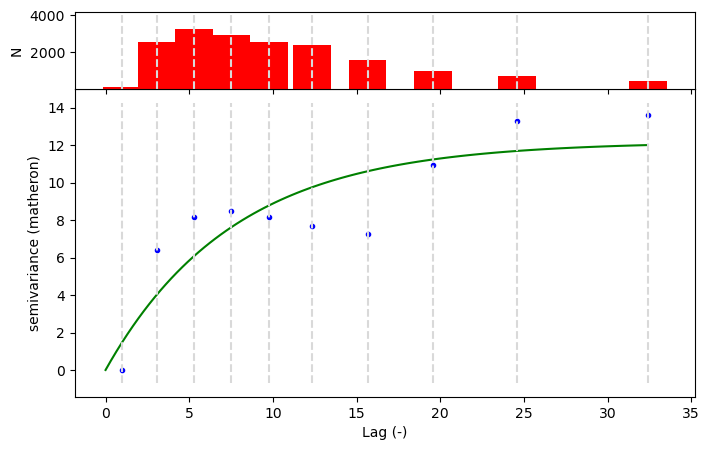

In [20]:
V = skg.Variogram(
    coordinates=coords,
    values=residuals,
    estimator='matheron',
    model='exponential',
    bin_func='kmeans',
    use_nugget=False,
    n_lags=10,
    normalize=False,
)
fig = V.plot(show=False)
print(V.describe())

ok = skg.OrdinaryKriging(V, min_points=3, max_points=25, mode='exact')
xx, yy = np.mgrid[0:40, 0:40]
field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
print(field.shape)

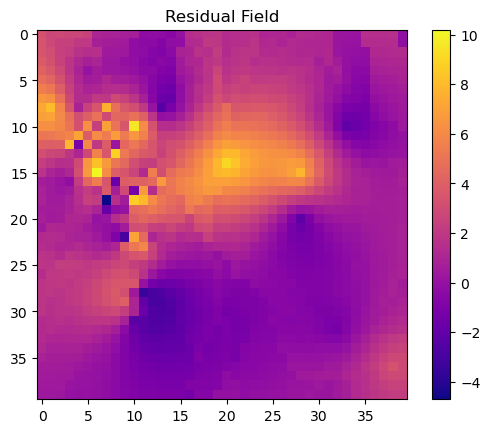

In [21]:
plt.title('Residual Field')
plt.imshow(field, cmap='plasma')
plt.colorbar()
plt.show()

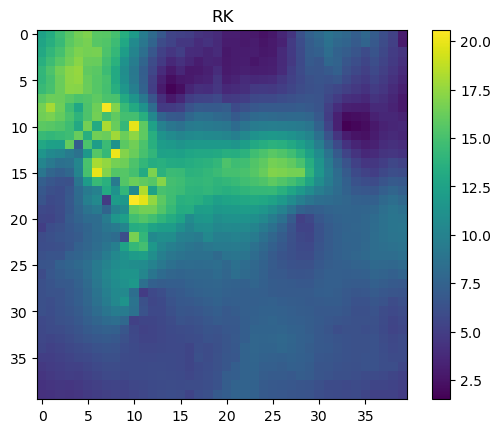

In [22]:
final_field = field + naqfc
plt.title('RK')
plt.imshow(final_field)
plt.colorbar()
plt.show()

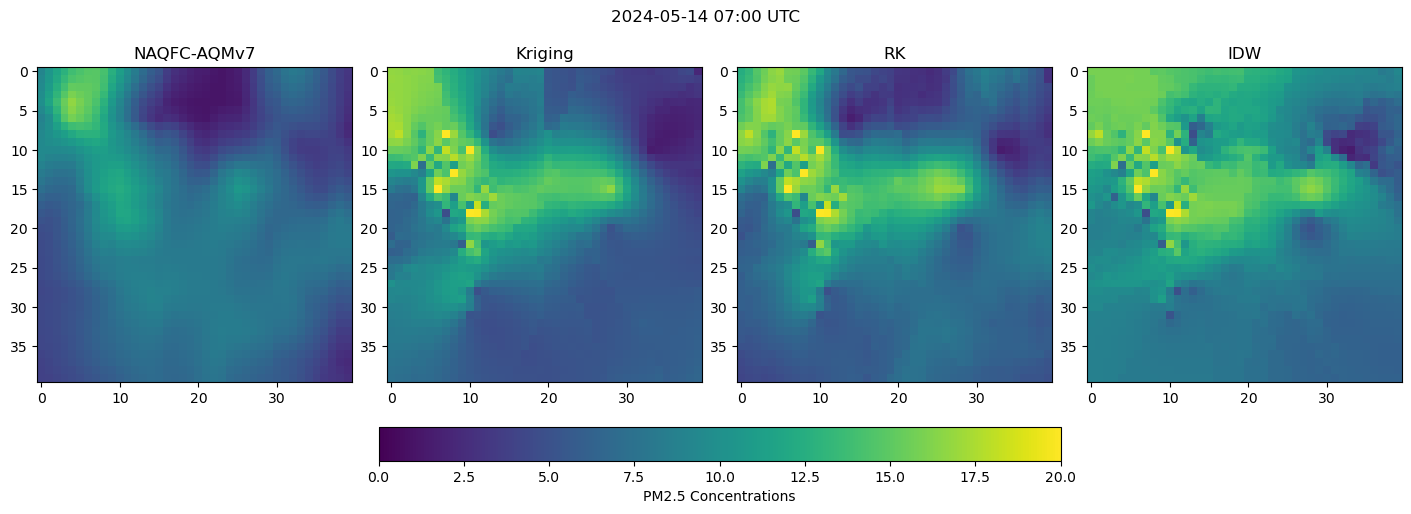

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(14, 5), constrained_layout=True)
im0 = axes[0].imshow(naqfc, **plot_params)
axes[0].set_title('NAQFC-AQMv7')

im1 = axes[1].imshow(kriged, **plot_params)
axes[1].set_title('Kriging')

im2 = axes[2].imshow(final_field, **plot_params)
axes[2].set_title('RK')

im3 = axes[3].imshow(idwed, **plot_params)
axes[3].set_title('IDW')

fig.colorbar(im1, ax=axes, orientation='horizontal', shrink=0.5, label=f'PM2.5 Concentrations')

plt.suptitle('2024-05-14 07:00 UTC')
plt.show()